In [1]:
import json
import zipfile
from pathlib import Path

import bibite_scripts as bb

print(bb)

<module 'bibite_scripts' from 'G:\\code\\bibite-scripts\\bibite_scripts\\__init__.py'>


In [2]:
def unzip_save(src: Path, dst: Path) -> None:
    if dst.exists():
        print(f"Deleting folder and contents {dst.name}...")
        shutil.rmtree(dst)
    with zipfile.ZipFile(src, 'r') as zip_ref:
        zip_ref.extractall(dst)


In [3]:
import os

root = Path(os.getcwd()).absolute()
print(root)
src = root / "world_autosave_20220917102459.zip"
dst = root / f"{src.stem}"
if not dst.exists():
    unzip_save(src, dst)

G:\code\bibite-scripts


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')

In [5]:
bibites = []
for bf in (dst / "bibites").iterdir():
    data = bb.bb8.read(bf)
    bibites.append(data)
mut_sigma = np.array([x["genes"]["genes"]["BrainMutationSigma"] for x in bibites])
avg_mut = np.array([x["genes"]["genes"]["BrainAverageMutation"] for x in bibites])

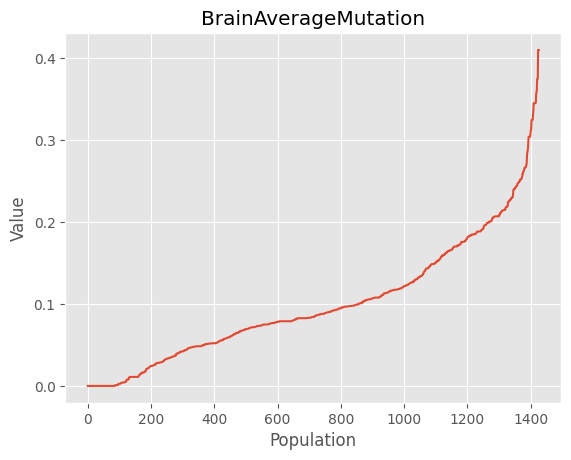

In [6]:
plt.title("BrainAverageMutation")
plt.xlabel("Population")
plt.ylabel("Value")
plt.plot(np.sort(avg_mut))

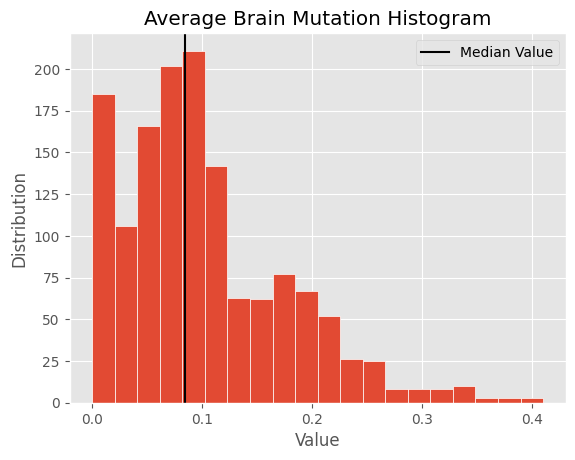

In [7]:
def hist(ar, name="", bins=20):
    plt.hist(ar, bins=bins, edgecolor='white')
    plt.axvline(np.median(ar), color='black', label="Median Value")
    plt.xlabel("Value")
    plt.ylabel("Distribution")
    plt.title(f"{name} Histogram")
    plt.legend()
    plt.show()
hist(avg_mut, "Average Brain Mutation")

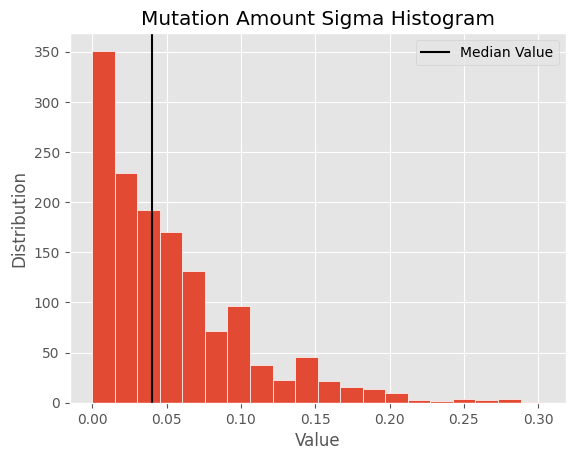

In [8]:
hist(mut_sigma, name="Mutation Amount Sigma")

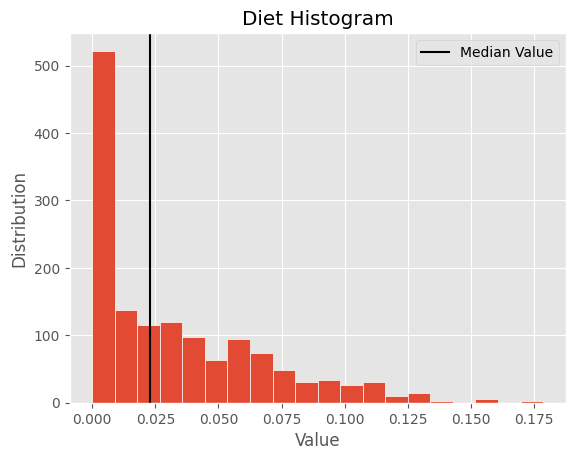

In [9]:
diet_array = np.array([x["genes"]["genes"]["Diet"] for x in bibites])
hist(diet_array, name="Diet")

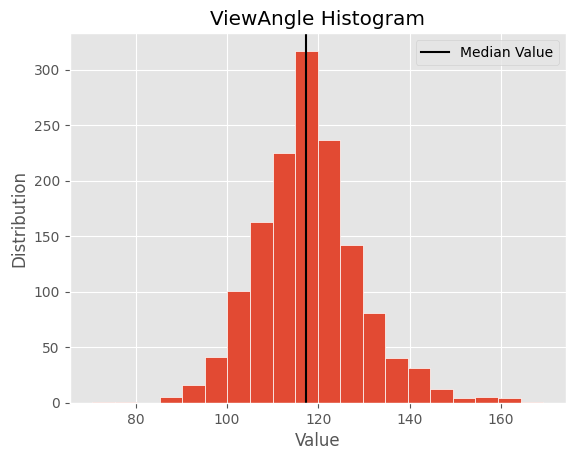

In [10]:
view_angle_array = np.array([x["genes"]["genes"]["ViewAngle"] for x in bibites])
hist(view_angle_array, name="ViewAngle")

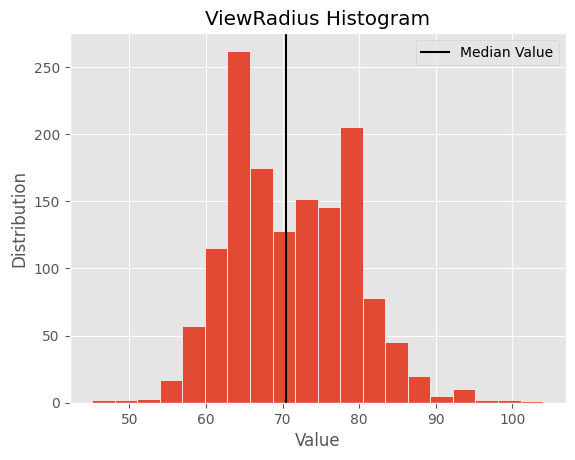

In [11]:
view_radius_array = np.array([x["genes"]["genes"]["ViewRadius"] for x in bibites])
hist(view_radius_array, name="ViewRadius")